<a href="https://colab.research.google.com/github/matyi101/stats/blob/main/Forecasting_on_Auto_Loan_Application_At_Islamic_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting on Auto Loan Application At Islamic Banking

In [ ]:
!pip install pystan
!pip install fbprophet

In [ ]:
import os
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from fbprophet import Prophet
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.colors as mcolors
import scipy.stats as stats
sns.set()

plt.style.use('fivethirtyeight')

In [ ]:
url = 'https://raw.githubusercontent.com/matyi101/stats/main/islamic_loan.csv'
df = pd.read_csv(url)
df

,date,vehicle,property,personal,credit card,consumer loan
0,2011-01-01,2706.397,2147.472,1574.988,238.925,0.116
1,2011-02-01,1992.288,1955.299,1455.753,166.503,0.034
2,2011-03-01,2313.784,3072.997,2180.135,277.362,0.040
3,2011-04-01,1883.896,3635.457,1716.299,255.266,0.237
4,2011-05-01,2232.802,4138.049,1843.763,209.453,0.232
...,...,...,...,...,...,...
115,2020-08-01,4776.557,11844.264,2554.465,564.418,0.000
116,2020-09-01,4960.012,13037.043,2987.149,629.092,5.515
117,2020-10-01,3867.833,12389.451,2658.326,459.273,4.230
118,2020-11-01,4707.025,12011.242,2676.911,482.274,0.000


In [ ]:
df = df[["date","vehicle"]] 
df = df.rename(columns = {"date":"ds","vehicle":"y"}) 

df.head(5)

,ds,y
0,2011-01-01,2706.397
1,2011-02-01,1992.288
2,2011-03-01,2313.784
3,2011-04-01,1883.896
4,2011-05-01,2232.802


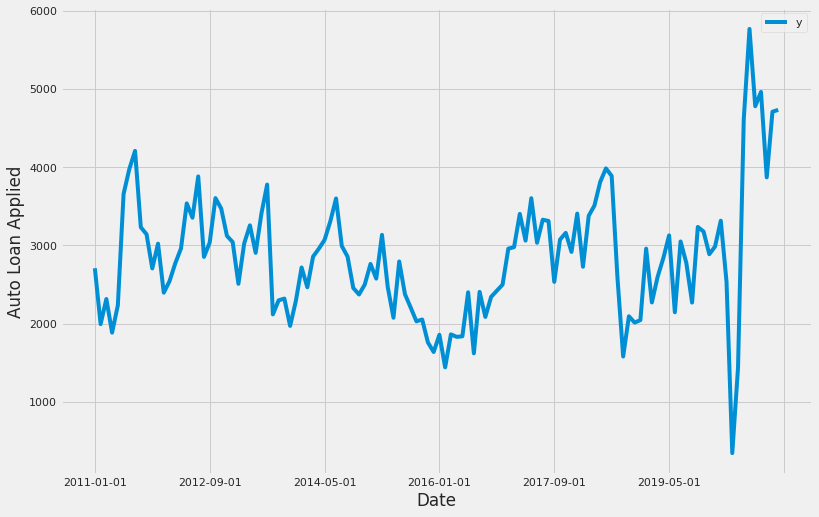

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Auto Loan Applied')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
151,2023-08-01
152,2023-09-01
153,2023-10-01
154,2023-11-01
155,2023-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2023-08-01,3826.648611,2498.972924,5172.495330
152,2023-09-01,3466.179122,2157.741906,4765.657752
153,2023-10-01,3682.618365,2321.684804,5063.024118
154,2023-11-01,3585.590768,2385.707821,4894.912818
155,2023-12-01,3562.818770,2147.932727,5001.557915


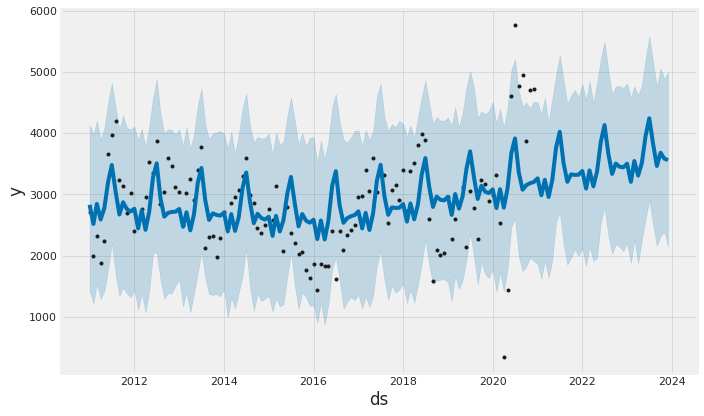

In [ ]:
my_model.plot(forecast,uncertainty=True);

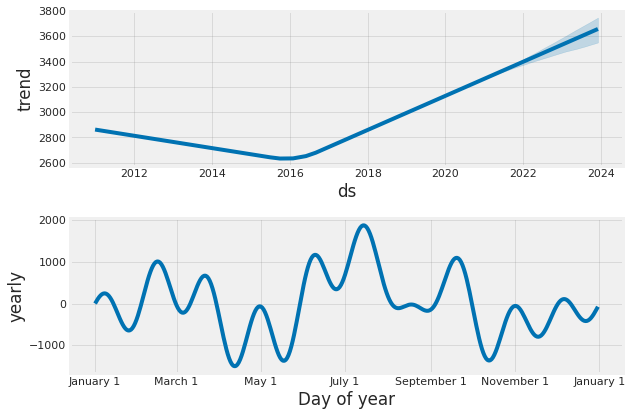

In [ ]:
my_model.plot_components(forecast);

In [ ]:
#!pip install pmdarima
#!pip install statsmodels 

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

from pandas import datetime
from pandas import DataFrame
plt.rcParams.update({'figure.figsize':(9,4), 'figure.dpi':80}) 


In [ ]:
df2 = pd.read_csv(url)
df2

,date,vehicle,property,personal,credit card,consumer loan
0,2011-01-01,2706.397,2147.472,1574.988,238.925,0.116
1,2011-02-01,1992.288,1955.299,1455.753,166.503,0.034
2,2011-03-01,2313.784,3072.997,2180.135,277.362,0.040
3,2011-04-01,1883.896,3635.457,1716.299,255.266,0.237
4,2011-05-01,2232.802,4138.049,1843.763,209.453,0.232
...,...,...,...,...,...,...
115,2020-08-01,4776.557,11844.264,2554.465,564.418,0.000
116,2020-09-01,4960.012,13037.043,2987.149,629.092,5.515
117,2020-10-01,3867.833,12389.451,2658.326,459.273,4.230
118,2020-11-01,4707.025,12011.242,2676.911,482.274,0.000


In [ ]:
from datetime import datetime, date 

df2['date'] = pd.to_datetime(df2['date'], format = '%Y/%m/%d')
df2.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,vehicle,property,personal,credit card,consumer loan
0,2011-01-01 00:00:00,2706.397000,2147.472000,1574.988000,238.925000,0.116000
1,2011-02-01 00:00:00,1992.288000,1955.299000,1455.753000,166.503000,0.034000
2,2011-03-01 00:00:00,2313.784000,3072.997000,2180.135000,277.362000,0.040000
3,2011-04-01 00:00:00,1883.896000,3635.457000,1716.299000,255.266000,0.237000
4,2011-05-01 00:00:00,2232.802000,4138.049000,1843.763000,209.453000,0.232000


Text(0, 0.5, 'Loan Applied')

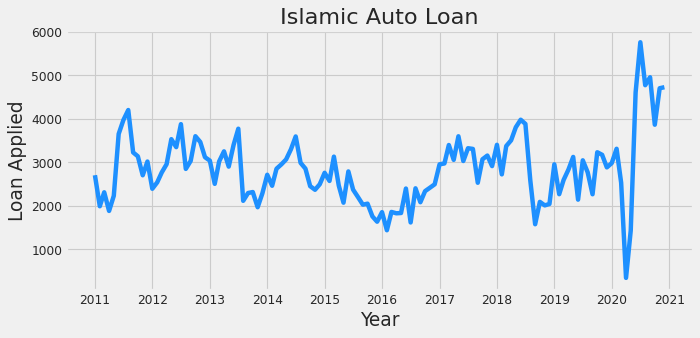

In [ ]:
# To compelte the data, as naive method, we will use ffill
sns.lineplot(x=df2['date'], y=df2['vehicle'].fillna(method='ffill'), color='dodgerblue')

plt.title("Islamic Auto Loan")
plt.xlabel("Year")
plt.ylabel("Loan Applied")

In [ ]:
df2 = df2.sort_values(by='date')

# Check time intervals
df2['delta'] = df2['date'] - df2['date'].shift(1)

df2[['date', 'delta']].head()

,date,delta
0,2011-01-01,NaT
1,2011-02-01,31 days
2,2011-03-01,28 days
3,2011-04-01,31 days
4,2011-05-01,30 days


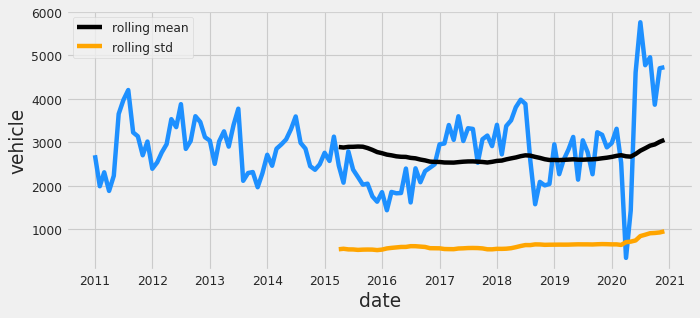

In [ ]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
#f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df2['date'], y=df2['vehicle'], color='dodgerblue')
sns.lineplot(x=df2['date'], y=df2['vehicle'].rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x=df2['date'], y=df2['vehicle'].rolling(rolling_window).std(), color='orange', label='rolling std')
#ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
#ax[0].set_ylabel(ylabel='value', fontsize=14)
#ax[0].set_xlim([date(1992, 1, 1), date(2005, 2, 1)])

## Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
series = df2['vehicle'].values
result = adfuller(series)
significance_level = 0.05
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

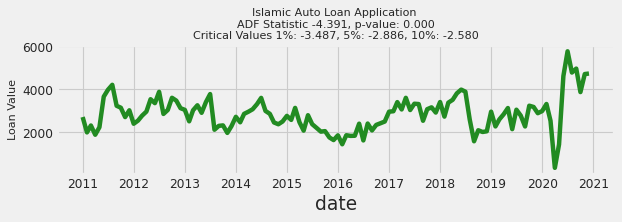

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df2.date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'Islamic Auto Loan Application \nADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=10)
    ax.set_ylabel(ylabel=title, fontsize=10)

visualize_adfuller_results(df2.vehicle.values, 'Loan Value', ax)

#f.delaxes(ax[0])
plt.tight_layout()
plt.show()
#plt.title("Sales")
#plt.xlabel("Year")
#plt.ylabel("Sales Value")

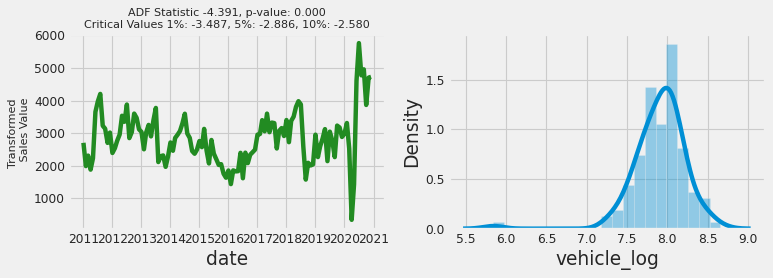

In [ ]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df2['vehicle_log'] = np.log(abs(df2['vehicle']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
visualize_adfuller_results(df2['vehicle'], 'Transformed \n Sales Value', ax[0])

sns.distplot(df2['vehicle_log'], ax=ax[1])

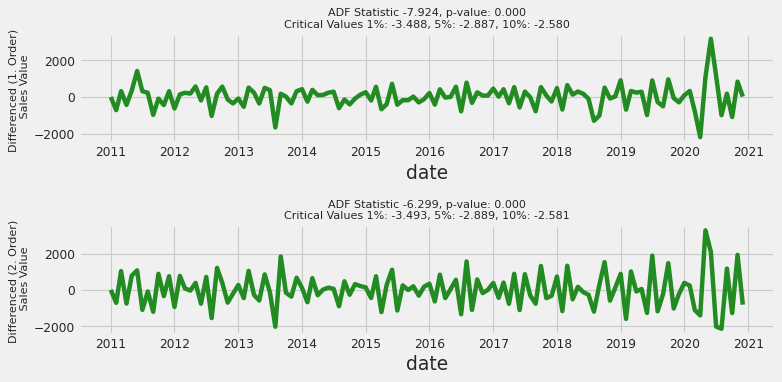

In [ ]:
# First Order Differencing
ts_diff = np.diff(df2['vehicle'])
df2['vehicle_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df2.vehicle_diff_1)
df2['vehicle_diff_2'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

visualize_adfuller_results(df2.vehicle_diff_1, 'Differenced (1. Order) \n Sales Value', ax[0])
visualize_adfuller_results(df2.vehicle_diff_2, 'Differenced (2. Order) \n Sales Value', ax[1])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['vehicle']

for column in core_columns:
    decomp = seasonal_decompose(df2[column], freq=52, model='additive', extrapolate_trend='freq')
    df2[f"{column}_trend"] = decomp.trend
    df2[f"{column}_seasonal"] = decomp.seasonal

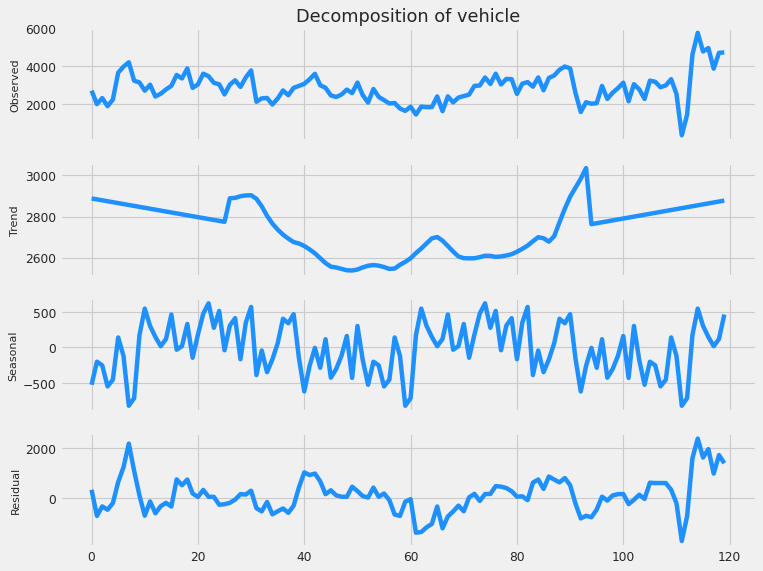

In [ ]:
core_columns =  ['vehicle']

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
res = seasonal_decompose(df2[column], freq=52, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of {}'.format(column), fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=10)

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=10)

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=10)
    
res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=10)

plt.show()

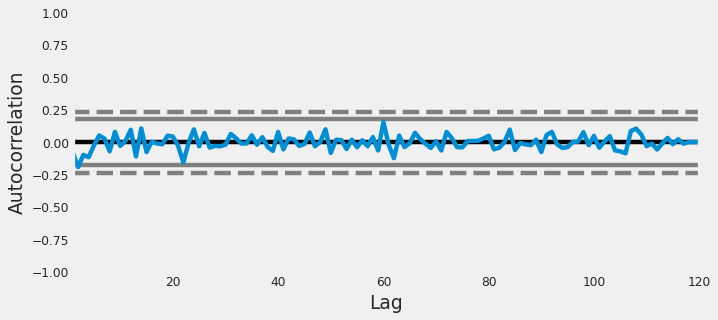

In [ ]:
autocorrelation_plot(df2['vehicle_diff_1'])
plt.show()

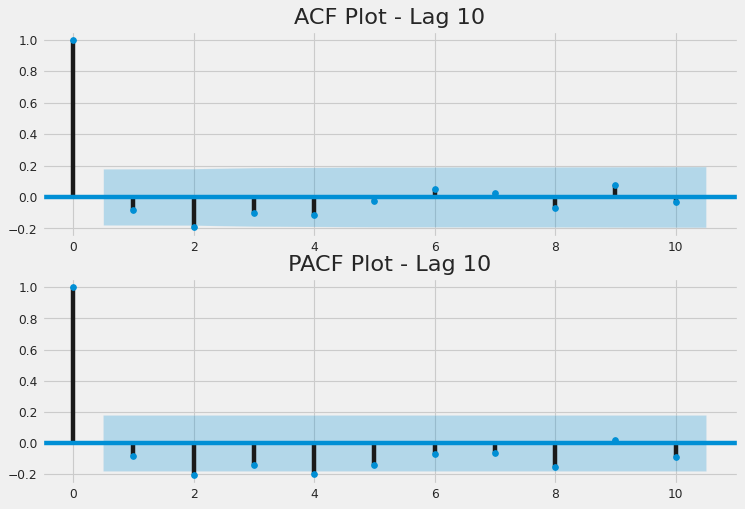

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

plot_acf(df2['vehicle_diff_1'], lags=10, ax=ax[0], title='ACF Plot - Lag 10')
plot_pacf(df2['vehicle_diff_1'], lags=10, ax=ax[1], title='PACF Plot - Lag 10')

plt.show()

In [ ]:
train_size = int(0.80 * len(df))
test_size = len(df) - train_size

univariate_df = df2[['date', 'vehicle']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(y_valid), len(x_valid))

24 24


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from fbprophet import Prophet

# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 1427.085969298387


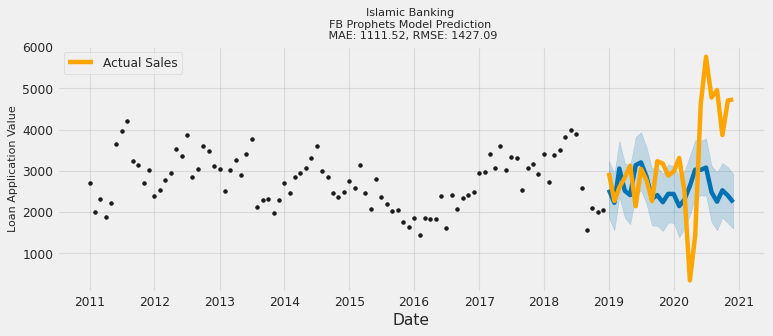

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(10)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Actual Sales') #navajowhite

ax.set_title(f"Islamic Banking \nFB Prophets Model Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}", fontsize=10)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Loan Application Value', fontsize=10)

plt.show()

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,0,0))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(24)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 1302.5730517650209


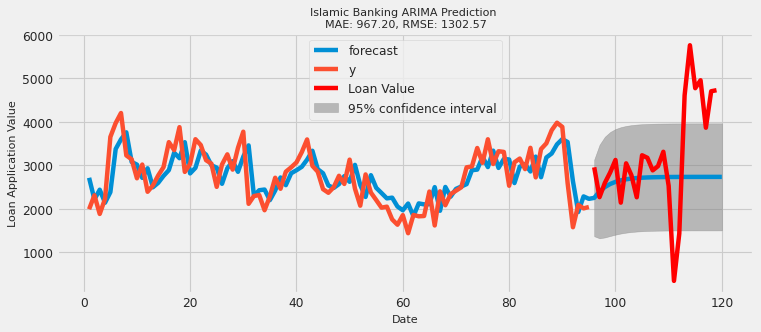

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(10)

model_fit.plot_predict(1, 120, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='red', label='Loan Value')

ax.set_title(f'Islamic Banking ARIMA Prediction \nMAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=10)
ax.set_xlabel(xlabel='Date', fontsize=10)
ax.set_ylabel(ylabel='Loan Application Value', fontsize=10)

plt.show()

In [ ]:
!pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(series, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1878.762, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1879.751, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1879.035, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1876.849, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.456 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -937.424
Date:                Fri, 11 Jun 2021   AIC                           1876.849
Time:                        16:21:15   BIC                           1879.628
Sample:                             0   HQIC                          1877.977
                                - 120                                         
Co